<a href="https://colab.research.google.com/github/Umeshtheru/green-hydrogen/blob/main/MNIST_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [60]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

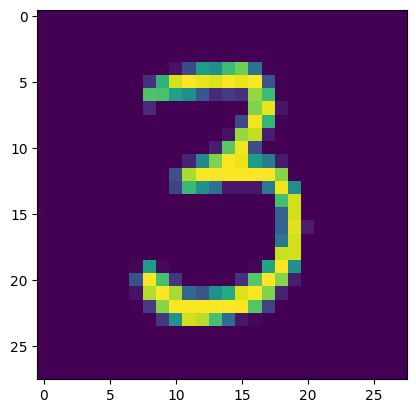

3


In [61]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape
#displaying image
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

In [62]:
#unique values in y_train
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimensions in this dataset

In [63]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

In [64]:
#Setting up the NN
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

In [65]:
#compiling of NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
#tarining the model
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3043 - accuracy: 0.9107
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1442 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1077 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0722 - accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0630 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0421 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

In [67]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9740


In [68]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [69]:
print(Y_pred[0])

[1.1368109e-04 1.4680471e-05 5.3853057e-03 7.2352797e-01 5.1631541e-06
 4.2381603e-03 6.5188146e-08 9.9950582e-01 2.5726266e-02 7.0805693e-01]


In [70]:
#model.predict() gives the prediction probability of each class for that data point
label_for_first_image=np.argmax(Y_pred[0])
label_for_first_image

7

In [71]:
#converting data for all test data
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [72]:
#Building a predictive System

input_image_path="/content/MNIST_digit.png"
input_image=cv2.imread(input_image_path)
print(input_image)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


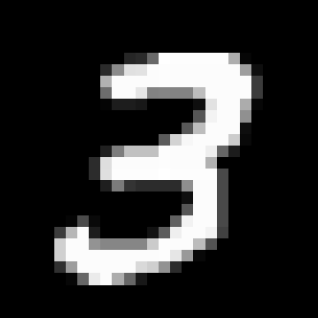

In [73]:
cv2_imshow(input_image)

In [74]:
input_image.shape

(318, 318, 3)

In [75]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image.shape

(318, 318, 3)

In [77]:
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize.shape
cv2_imshow(input_image_resize)

In [78]:
input_image_resize=input_image_resize/255

In [80]:
image_reshape=np.reshape(input_image_resize,[1,28,28])

In [85]:
input_prediction=model.predict(image_reshape)
input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

1/1 [==============================] - 0s 20ms/step
3


Predictive System

Path of the image to be predicted:/content/MNIST_digit.png


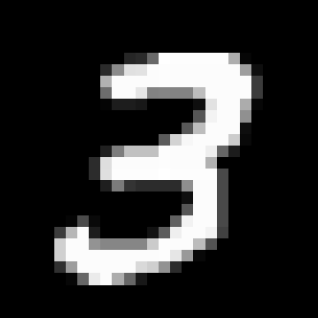

1/1 [==============================] - 0s 25ms/step
The Handwritten digit is recognised as 3


In [90]:
input_image_path = input('Path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshape=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshape)
input_prediction_label=np.argmax(input_prediction)
print('The Handwritten digit is recognised as', input_prediction_label)
